# PROJECT- HOUSING: PRICE PREDICTION

# Problem Statement:

Houses are one of the necessary need of each and every person around the globe and therefore housing and real estate
market is one of the markets which is one of the major contributors in the world’s economy.

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses
data analytics to purchase houses at a price below their actual values and flip them at a higher price. For the same
purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file.

You are required to model the price of houses with the available independent variables. This model will then be used
by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the
strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for the
management to understand the pricing dynamics of a new market.

# Importing all the necessary libraraies:

In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Loading the Training Dataset:

In [4]:
df=pd.read_csv('train.csv')
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,289,20,RL,NaN,9819,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,122000
1164,554,20,RL,67.0,8777,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,5,2009,WD,Normal,108000
1165,196,160,RL,24.0,2280,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,148500
1166,31,70,C (all),50.0,8500,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,7,2008,WD,Normal,40000


# Load the Test Dataset:

In [5]:
df1=pd.read_csv('test.csv')
df1

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,337,20,RL,86.0,14157,Pave,NaN,IR1,HLS,AllPub,...,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal
1,1018,120,RL,NaN,5814,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,8,2009,COD,Abnorml
2,929,20,RL,NaN,11838,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
3,1148,70,RL,75.0,12000,Pave,NaN,Reg,Bnk,AllPub,...,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal
4,1227,60,RL,86.0,14598,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,83,20,RL,78.0,10206,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,10,2008,WD,Normal
288,1048,20,RL,57.0,9245,Pave,NaN,IR2,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
289,17,20,RL,NaN,11241,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Shed,700,3,2010,WD,Normal
290,523,50,RM,50.0,5000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,10,2006,WD,Normal


# Data Description:
Target variable is SalePrice which is to find out the price of ahouse with repect to feature variable conditions.

@MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

@MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density
	
@LotFrontage: Linear feet of street connected to property

@LotArea: Lot size in square feet

@Street: Type of road access to property

       Grvl	Gravel	
       Pave	Paved
       	
@Alley: Type of alley access to property

       Grvl	Gravel
       Pave	Paved
       NA 	No alley access
		
@LotShape: General shape of property

       Reg	Regular	
       IR1	Slightly irregular
       IR2	Moderately Irregular
       IR3	Irregular
       
@LandContour: Flatness of the property

       Lvl	Near Flat/Level	
       Bnk	Banked - Quick and significant rise from street grade to building
       HLS	Hillside - Significant slope from side to side
       Low	Depression
		
@Utilities: Type of utilities available
		
       AllPub	All public Utilities (E,G,W,& S)	
       NoSewr	Electricity, Gas, and Water (Septic Tank)
       NoSeWa	Electricity and Gas Only
       ELO	Electricity only	
	
@LotConfig: Lot configuration

       Inside	Inside lot
       Corner	Corner lot
       CulDSac	Cul-de-sac
       FR2	Frontage on 2 sides of property
       FR3	Frontage on 3 sides of property
	
@LandSlope: Slope of property
		
       Gtl	Gentle slope
       Mod	Moderate Slope	
       Sev	Severe Slope
	
@Neighborhood: Physical locations within Ames city limits

       Blmngtn	Bloomington Heights
       Blueste	Bluestem
       BrDale	Briardale
       BrkSide	Brookside
       ClearCr	Clear Creek
       CollgCr	College Creek
       Crawfor	Crawford
       Edwards	Edwards
       Gilbert	Gilbert
       IDOTRR	Iowa DOT and Rail Road
       MeadowV	Meadow Village
       Mitchel	Mitchell
       Names	North Ames
       NoRidge	Northridge
       NPkVill	Northpark Villa
       NridgHt	Northridge Heights
       NWAmes	Northwest Ames
       OldTown	Old Town
       SWISU	South & West of Iowa State University
       Sawyer	Sawyer
       SawyerW	Sawyer West
       Somerst	Somerset
       StoneBr	Stone Brook
       Timber	Timberland
       Veenker	Veenker
			
@Condition1: Proximity to various conditions
	
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad
	
@Condition2: Proximity to various conditions (if more than one is present)
		
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad
	
@BldgType: Type of dwelling
		
       1Fam	Single-family Detached	
       2FmCon	Two-family Conversion; originally built as one-family dwelling
       Duplx	Duplex
       TwnhsE	Townhouse End Unit
       TwnhsI	Townhouse Inside Unit
	
@HouseStyle: Style of dwelling
	
       1Story	One story
       1.5Fin	One and one-half story: 2nd level finished
       1.5Unf	One and one-half story: 2nd level unfinished
       2Story	Two story
       2.5Fin	Two and one-half story: 2nd level finished
       2.5Unf	Two and one-half story: 2nd level unfinished
       SFoyer	Split Foyer
       SLvl	Split Level
	
@OverallQual: Rates the overall material and finish of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor
	
@OverallCond: Rates the overall condition of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average	
       5	Average
       4	Below Average	
       3	Fair
       2	Poor
       1	Very Poor
		
@YearBuilt: Original construction date

@YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)

@RoofStyle: Type of roof

    Flat	Flat
    Gable	Gable
    Gambrel	Gabrel (Barn)
    Hip	Hip
    Mansard	Mansard
    hed	Shed
		
@RoofMatl: Roof material

       ClyTile	Clay or Tile
        CompShg	Standard (Composite) Shingle
         Membran	Membrane
            Metal	Metal
        Roll	Roll
         Tar&Grv	Gravel & Tar
        WdShake	Wood Shakes
        WdShngl	Wood Shingles
		
@Exterior1st: Exterior covering on house

       AsbShng	Asbestos Shingles
        AsphShn	Asphalt Shingles
        BrkComm	Brick Common
        BrkFace	Brick Face
        CBlock	Cinder Block
         CemntBd	Cement Board
        HdBoard	Hard Board
         ImStucc	Imitation Stucco
        MetalSd	Metal Siding
        Other	Other
        Plywood	Plywood
        PreCast	PreCast	
        Stone	Stone
        Stucco	Stucco
        VinylSd	Vinyl Siding
        Wd Sdng	Wood Siding
        WdShing	Wood Shingles
	
@Exterior2nd: Exterior covering on house (if more than one material)

       AsbShng	Asbestos Shingles
        AsphShn	Asphalt Shingles
    BrkComm	Brick Common
       BrkFace	Brick Face
    CBlock	Cinder Block
       CemntBd	Cement Board
    HdBoard	Hard Board
       ImStucc	Imitation Stucco
    MetalSd	Metal Siding
       Other	Other
    Plywood	Plywood
       PreCast	PreCast
    Stone	Stone
       Stucco	Stucco
    VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
    WdShing	Wood Shingles
	
@MasVnrType: Masonry veneer type

       BrkCmn	Brick Common
    BrkFace	Brick Face
       CBlock	Cinder Block
    None	None
       Stone	Stone
	
@MasVnrArea: Masonry veneer area in square feet

@ExterQual: Evaluates the quality of the material on the exterior 
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
@ExterCond: Evaluates the present condition of the material on the exterior
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
@Foundation: Type of foundation
		
       BrkTil	Brick & Tile
       CBlock	Cinder Block
       PConc	Poured Contrete	
       Slab	Slab
       Stone	Stone
       Wood	Wood
		
@BsmtQual: Evaluates the height of the basement

       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
       NA	No Basement
		
@BsmtCond: Evaluates the general condition of the basement

       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement
	
@BsmtExposure: Refers to walkout or garden level walls

       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)	
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement
	
@BsmtFinType1: Rating of basement finished area

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement
		
@BsmtFinSF1: Type 1 finished square feet

@BsmtFinType2: Rating of basement finished area (if multiple types)

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

@BsmtFinSF2: Type 2 finished square feet

@BsmtUnfSF: Unfinished square feet of basement area

@TotalBsmtSF: Total square feet of basement area

@Heating: Type of heating
		
       Floor	Floor Furnace
       GasA	Gas forced warm air furnace
       GasW	Gas hot water or steam heat
       Grav	Gravity furnace	
       OthW	Hot water or steam heat other than gas
       Wall	Wall furnace
		
@HeatingQC: Heating quality and condition

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
@CentralAir: Central air conditioning

       N	No
       Y	Yes
		
@Electrical: Electrical system

       SBrkr	Standard Circuit Breakers & Romex
       FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)	
       FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
       FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
       Mix	Mixed
		
@1stFlrSF: First Floor square feet
 
@2ndFlrSF: Second floor square feet

@LowQualFinSF: Low quality finished square feet (all floors)

@GrLivArea: Above grade (ground) living area square feet

@BsmtFullBath: Basement full bathrooms

@BsmtHalfBath: Basement half bathrooms

@FullBath: Full bathrooms above grade

@HalfBath: Half baths above grade

@Bedroom: Bedrooms above grade (does NOT include basement bedrooms)

@Kitchen: Kitchens above grade

@KitchenQual: Kitchen quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       	
@TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

@Functional: Home functionality (Assume typical unless deductions are warranted)

       Typ	Typical Functionality
       Min1	Minor Deductions 1
       Min2	Minor Deductions 2
       Mod	Moderate Deductions
       Maj1	Major Deductions 1
       Maj2	Major Deductions 2
       Sev	Severely Damaged
       Sal	Salvage only
		
@Fireplaces: Number of fireplaces

@FireplaceQu: Fireplace quality

       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace
		
@GarageType: Garage location
		
       2Types	More than one type of garage
       Attchd	Attached to home
       Basment	Basement Garage
       BuiltIn	Built-In (Garage part of house - typically has room above garage)
       CarPort	Car Port
       Detchd	Detached from home
       NA	No Garage
		
@GarageYrBlt: Year garage was built
		
@GarageFinish: Interior finish of the garage

       Fin	Finished
       RFn	Rough Finished	
       Unf	Unfinished
       NA	No Garage
		
@GarageCars: Size of garage in car capacity

@GarageArea: Size of garage in square feet

@GarageQual: Garage quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
		
@GarageCond: Garage condition

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
		
@PavedDrive: Paved driveway

       Y	Paved 
       P	Partial Pavement
       N	Dirt/Gravel
		
@WoodDeckSF: Wood deck area in square feet

@OpenPorchSF: Open porch area in square feet

@EnclosedPorch: Enclosed porch area in square feet

@3SsnPorch: Three season porch area in square feet

@ScreenPorch: Screen porch area in square feet

@PoolArea: Pool area in square feet

@PoolQC: Pool quality
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       NA	No Pool
		
@Fence: Fence quality
		
       GdPrv	Good Privacy
       MnPrv	Minimum Privacy
       GdWo	Good Wood
       MnWw	Minimum Wood/Wire
       NA	No Fence
	
@MiscFeature: Miscellaneous feature not covered in other categories
		
       Elev	Elevator
       Gar2	2nd Garage (if not described in garage section)
       Othr	Other
       Shed	Shed (over 100 SF)
       TenC	Tennis Court
       NA	None
		
@MiscVal: $Value of miscellaneous feature

@MoSold: Month Sold (MM)

@YrSold: Year Sold (YYYY)

@SaleType: Type of sale
		
       WD 	Warranty Deed - Conventional
       CWD	Warranty Deed - Cash
       VWD	Warranty Deed - VA Loan
       New	Home just constructed and sold
       COD	Court Officer Deed/Estate
       Con	Contract 15% Down payment regular terms
       ConLw	Contract Low Down payment and low interest
       ConLI	Contract Low Interest
       ConLD	Contract Low Down
       Oth	Other
		
@SaleCondition: Condition of sale

       Normal	Normal Sale
       Abnorml	Abnormal Sale -  trade, foreclosure, short sale
       AdjLand	Adjoining Land Purchase
       Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
       Family	Sale between family members
       Partial	Home was not completed when last assessed (associated with New Homes)

In [4]:
df.shape    # Describing the dimension of the train dataset

(1168, 81)

In [5]:
df.info()    # Getting the information of df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

In [6]:
#Checking the null count  of the df:
null_counts = df.isnull().sum()
null_counts[null_counts > 0]

LotFrontage      214
Alley           1091
MasVnrType         7
MasVnrArea         7
BsmtQual          30
BsmtCond          30
BsmtExposure      31
BsmtFinType1      30
BsmtFinType2      31
FireplaceQu      551
GarageType        64
GarageYrBlt       64
GarageFinish      64
GarageQual        64
GarageCond        64
PoolQC          1161
Fence            931
MiscFeature     1124
dtype: int64

# Removing the null values using Iterative imputer:

# Iterative imputer for traing and testing data:

In [6]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.compose import make_column_transformer
iter_imp=IterativeImputer()
ct=make_column_transformer( (iter_imp,['LotFrontage','MasVnrArea','GarageYrBlt']),
                            remainder='passthrough')

it=pd.DataFrame(ct.fit_transform(df))
it

,0,1,2,3,4,5,6,7,8,9,...,71,72,73,74,75,76,77,78,79,80
0,68.320114,0.0,1977.0,127,120,RL,4928,Pave,NaN,IR1,...,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,95.0,0.0,1970.0,889,20,RL,15865,Pave,NaN,IR1,...,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,92.0,0.0,1997.0,793,60,RL,9920,Pave,NaN,IR1,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,105.0,480.0,1977.0,110,20,RL,11751,Pave,NaN,IR1,...,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,71.564346,126.0,1977.0,422,20,RL,16635,Pave,NaN,IR1,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,69.099063,31.0,1970.0,289,20,RL,9819,Pave,NaN,IR1,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,122000
1164,67.0,0.0,2002.0,554,20,RL,8777,Pave,NaN,Reg,...,0,NaN,MnPrv,NaN,0,5,2009,WD,Normal,108000
1165,24.0,0.0,1976.0,196,160,RL,2280,Pave,NaN,Reg,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,148500
1166,50.0,0.0,1920.0,31,70,C (all),8500,Pave,Pave,Reg,...,0,NaN,MnPrv,NaN,0,7,2008,WD,Normal,40000


In [7]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.compose import make_column_transformer
iter_imp=IterativeImputer()
ct=make_column_transformer( (iter_imp,['LotFrontage','MasVnrArea','GarageYrBlt']),
                            remainder='passthrough')

it1=pd.DataFrame(ct.fit_transform(df1))
it1

,0,1,2,3,4,5,6,7,8,9,...,70,71,72,73,74,75,76,77,78,79
0,86.0,200.0,2005.0,337,20,RL,14157,Pave,NaN,IR1,...,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal
1,64.851244,0.0,1984.0,1018,120,RL,5814,Pave,NaN,IR1,...,0,0,NaN,NaN,NaN,0,8,2009,COD,Abnorml
2,64.972433,0.0,2001.0,929,20,RL,11838,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
3,75.0,0.0,1941.0,1148,70,RL,12000,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal
4,86.0,74.0,2007.0,1227,60,RL,14598,Pave,NaN,IR1,...,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,78.0,468.0,2007.0,83,20,RL,10206,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,10,2008,WD,Normal
288,57.0,0.0,1996.0,1048,20,RL,9245,Pave,NaN,IR2,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
289,67.620775,180.0,1970.0,17,20,RL,11241,Pave,NaN,IR1,...,0,0,NaN,NaN,Shed,700,3,2010,WD,Normal
290,50.0,0.0,1950.0,523,50,RM,5000,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,10,2006,WD,Normal


In [8]:
column_to_move = it.pop(0)
it.insert(5, 'LotFrontage', column_to_move)
column_to_move1 = it.pop(1)
it.insert(28, 'MasVnrArea', column_to_move1)
column_to_move2 = it.pop(2)
it.insert(61, 'GarageYrBlt', column_to_move2)


In [9]:
column_to_mov = it1.pop(0)
it1.insert(5, 'LotFrontage', column_to_mov)

column_to_mov1 = it1.pop(1)
it1.insert(28, 'MasVnrArea', column_to_mov1)

column_to_mov2 = it1.pop(2)
it1.insert(61, 'GarageYrBlt', column_to_mov2)

In [10]:
it.columns=df.columns
it.index=df.index
it1.columns=df1.columns
it1.index=df1.index

In [11]:
it

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,68.320114,4928,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,71.564346,16635,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,289,20,RL,69.099063,9819,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,122000
1164,554,20,RL,67.0,8777,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,5,2009,WD,Normal,108000
1165,196,160,RL,24.0,2280,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,148500
1166,31,70,C (all),50.0,8500,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,7,2008,WD,Normal,40000


In [12]:
it1

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,337,20,RL,86.0,14157,Pave,NaN,IR1,HLS,AllPub,...,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal
1,1018,120,RL,64.851244,5814,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,8,2009,COD,Abnorml
2,929,20,RL,64.972433,11838,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
3,1148,70,RL,75.0,12000,Pave,NaN,Reg,Bnk,AllPub,...,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal
4,1227,60,RL,86.0,14598,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,83,20,RL,78.0,10206,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,10,2008,WD,Normal
288,1048,20,RL,57.0,9245,Pave,NaN,IR2,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
289,17,20,RL,67.620775,11241,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Shed,700,3,2010,WD,Normal
290,523,50,RM,50.0,5000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,10,2006,WD,Normal


# Filling all the Non numeric Data using fillna method:

In [13]:
it = it.apply(lambda x: x.fillna(x.value_counts().index[0]))
it.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64

In [15]:
it1 = it1.apply(lambda x: x.fillna(x.value_counts().index[0]))
it1.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
Length: 79, dtype: int64

# Dropping the unwanted columns:

In [14]:
it1=it1.drop(columns=['PoolQC'],axis=1)
it=it.drop(columns=['PoolQC'],axis=1)

# Checking the null count using Heat Map:

> # Testing Data:

<AxesSubplot:>

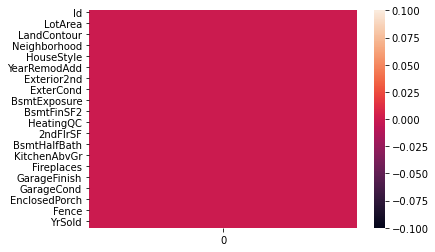

In [19]:
sns.heatmap(it1.isnull().sum().to_frame())

> # Training Data:

<AxesSubplot:>

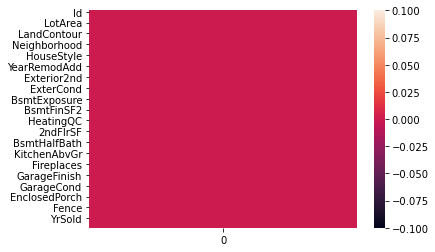

In [20]:
sns.heatmap(it.isnull().sum().to_frame())

# Data Description:

In [21]:
it.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,ExterQual,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,...,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,724.136130,56.767979,70.964446,10484.749144,6.104452,5.595890,1970.930651,1984.758562,102.592351,444.726027,...,96.206336,46.559932,23.015411,3.639555,15.051370,3.448630,47.315068,6.344178,2007.804795,181477.005993
std,416.159877,41.940650,22.497878,8957.442311,1.390153,1.124343,30.145255,20.785185,182.109790,462.664785,...,126.158988,66.381023,63.191089,29.088867,55.080816,44.896939,543.264432,2.686352,1.329738,79105.586863
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1875.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,360.500000,20.000000,60.000000,7621.500000,5.000000,5.000000,1954.000000,1966.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,130375.000000
50%,714.500000,50.000000,69.601503,9522.500000,6.000000,5.000000,1972.000000,1993.000000,0.000000,385.500000,...,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163995.000000
75%,1079.500000,70.000000,80.000000,11515.500000,7.000000,6.000000,2000.000000,2004.000000,160.000000,714.500000,...,171.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,215000.000000
max,1460.000000,190.000000,313.000000,164660.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


>There are almost 38 columns description such as count,mean,std,minand maximum values is described above.

# Getting the numeric datatype:


In [16]:
integer_columns = it.select_dtypes(include=['int64','float64']).columns

# Data Visualization:

Scatter plot of all the numeric features is showm below:

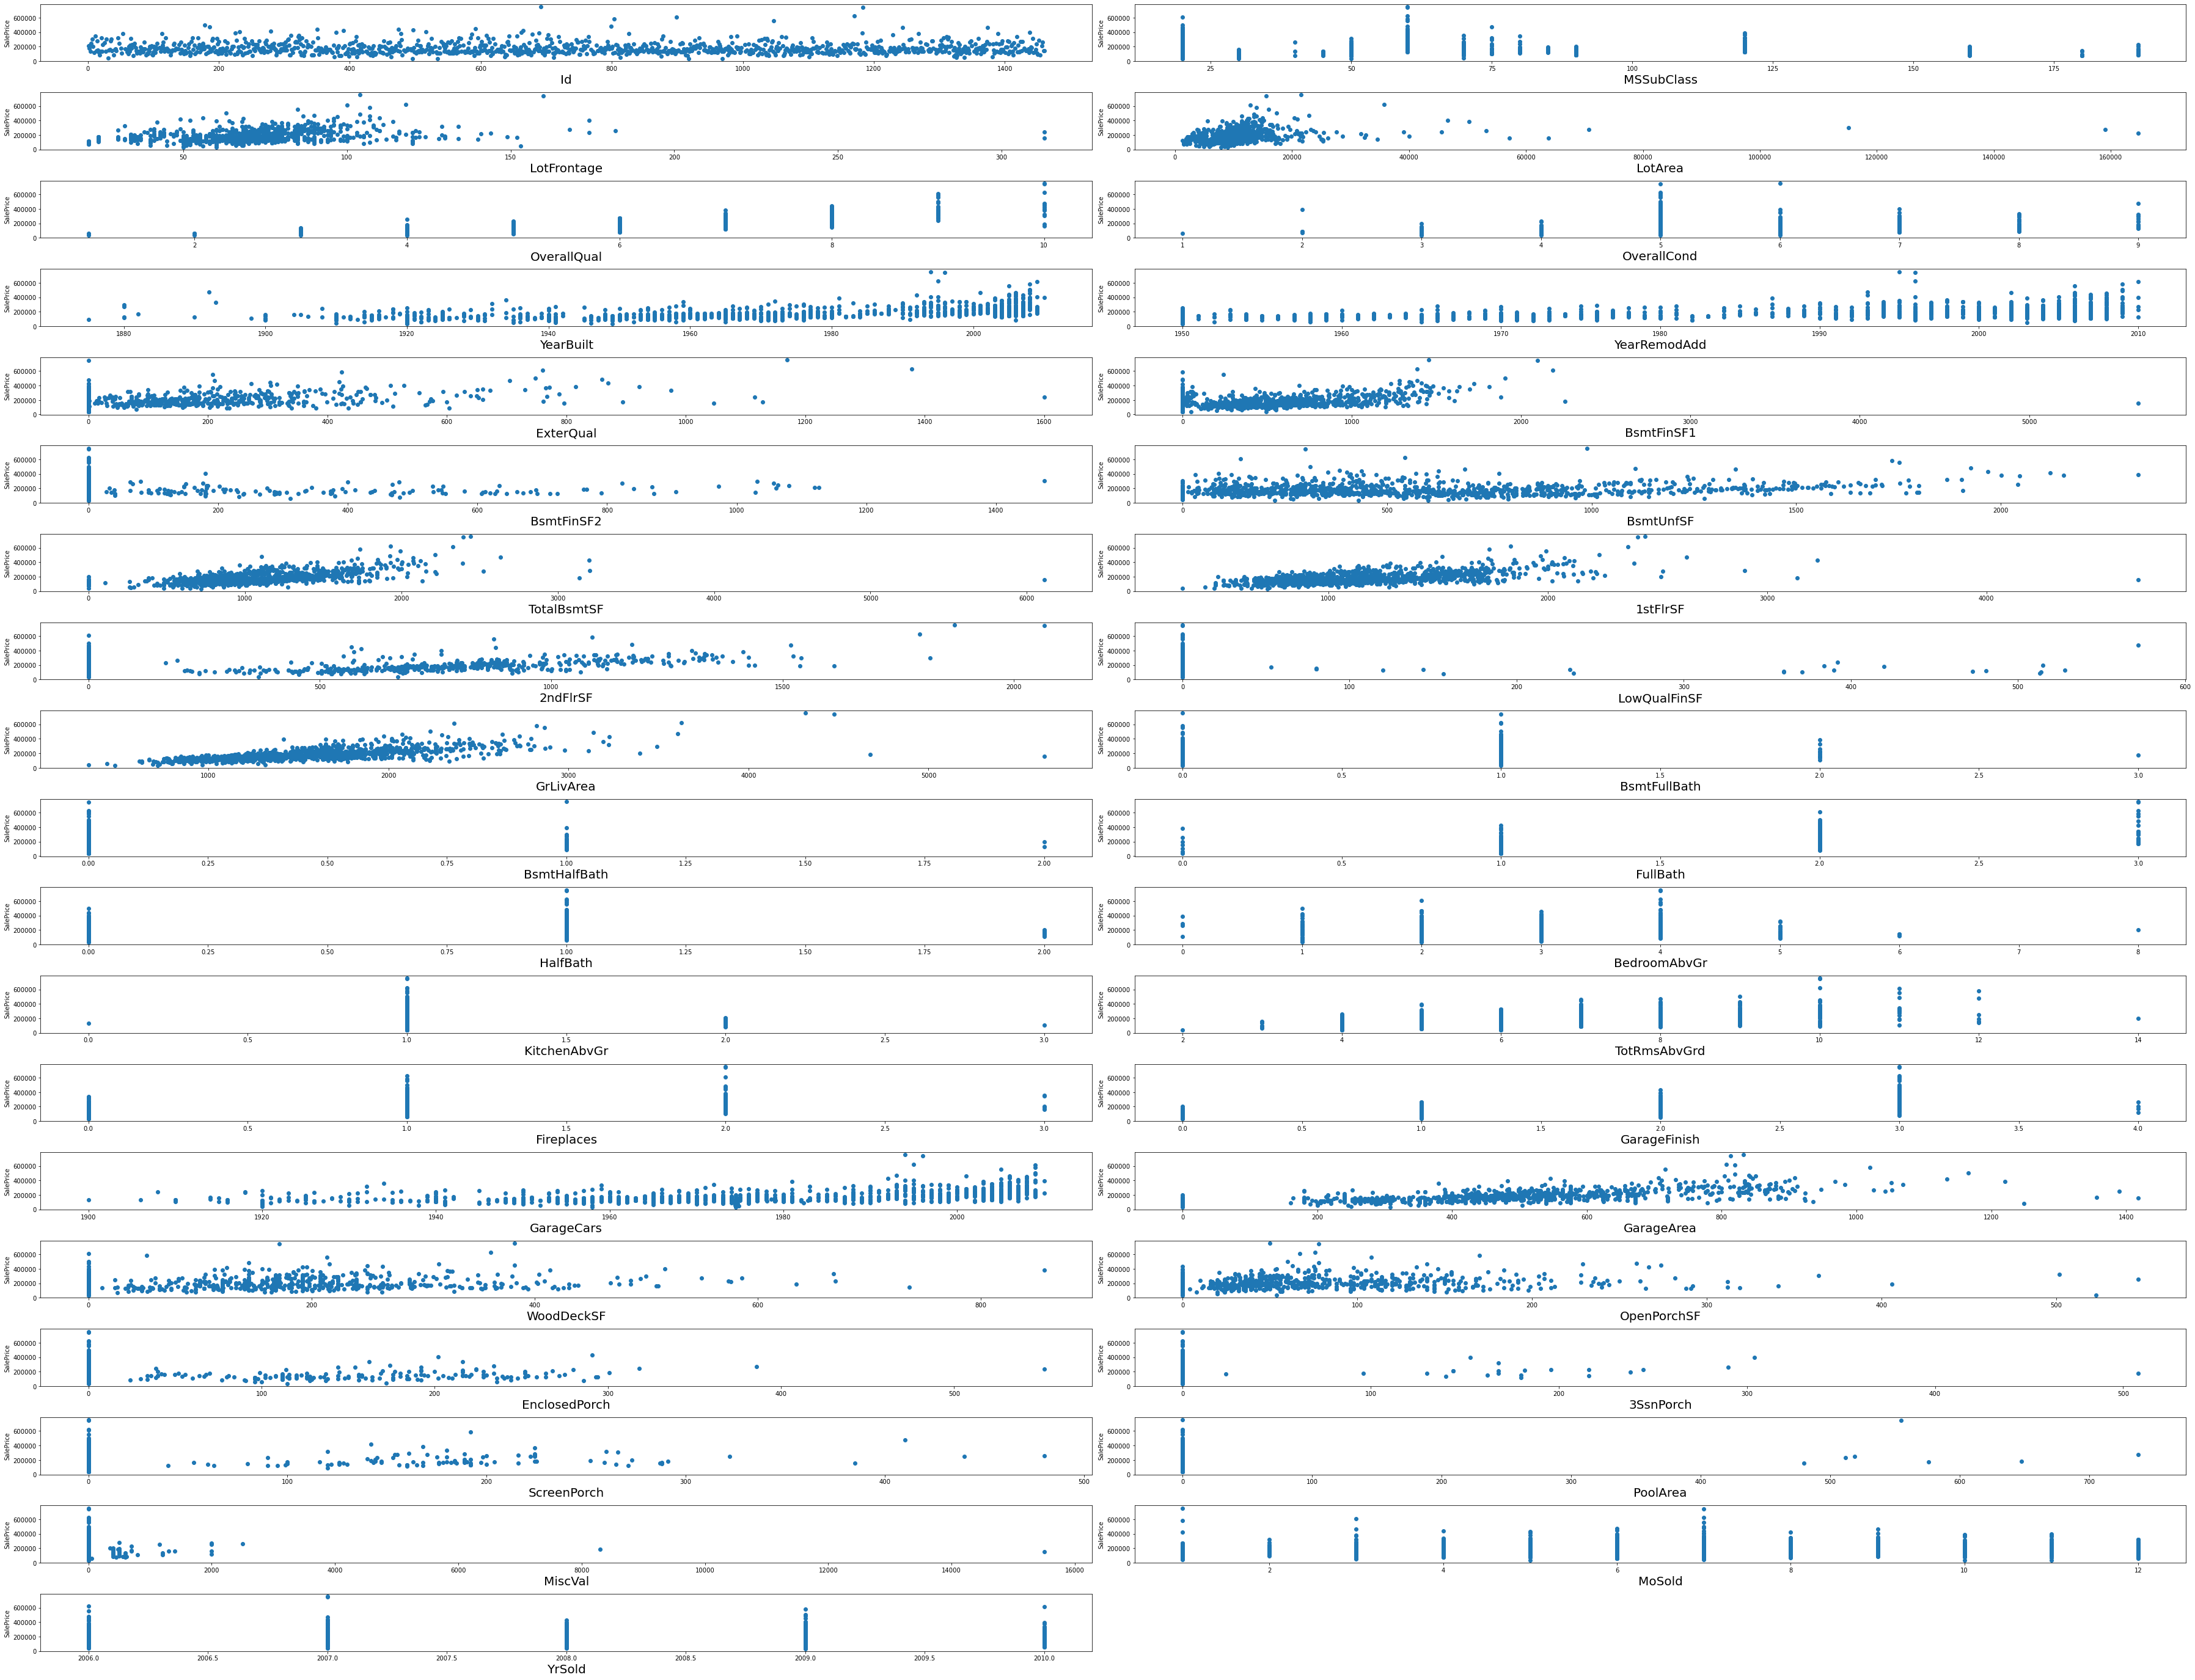

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

y=it['SalePrice']
#x=it.drop(columns=['SalePrice'])
z=it[integer_columns].drop(columns=['SalePrice'])
plt.figure(figsize=(50,100),facecolor='white')
plotnumber=1
for column in z:
    if plotnumber<=100:
        ax=plt.subplot(50,2,plotnumber)
        plt.scatter(z[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('SalePrice',fontsize=10)
    plotnumber+=1 
plt.tight_layout()

# Graphical analysis of target variable:

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

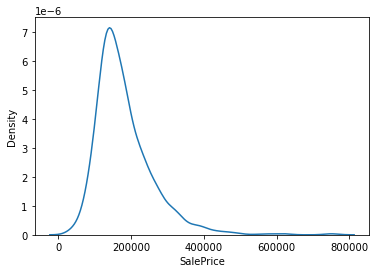

In [56]:
ax=sns.distplot(y,kde=True,hist=False)
ax

>The above graph seems to have little Skewness which can be resolved further.

# Encoder:

# OrdinalEncoding:
>TO convert all object type data to numerical of both training and testing data.

In [17]:
from sklearn.preprocessing import OrdinalEncoder
ord_enc=OrdinalEncoder()

for i in it.columns:
    if it[i].dtypes=="object":
        it[i]=ord_enc.fit_transform(it[i].values.reshape(-1,1))
it

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,3.0,68.320114,4928,1.0,0.0,0.0,3.0,0.0,...,0,0,2.0,2.0,0,2,2007,8.0,4.0,128000
1,889,20,3.0,95.000000,15865,1.0,0.0,0.0,3.0,0.0,...,224,0,2.0,2.0,0,10,2007,8.0,4.0,268000
2,793,60,3.0,92.000000,9920,1.0,0.0,0.0,3.0,0.0,...,0,0,2.0,2.0,0,6,2007,8.0,4.0,269790
3,110,20,3.0,105.000000,11751,1.0,0.0,0.0,3.0,0.0,...,0,0,2.0,2.0,0,1,2010,0.0,4.0,190000
4,422,20,3.0,71.564346,16635,1.0,0.0,0.0,3.0,0.0,...,0,0,2.0,2.0,0,6,2009,8.0,4.0,215000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,289,20,3.0,69.099063,9819,1.0,0.0,0.0,3.0,0.0,...,0,0,2.0,2.0,0,2,2010,8.0,4.0,122000
1164,554,20,3.0,67.000000,8777,1.0,0.0,3.0,3.0,0.0,...,0,0,2.0,2.0,0,5,2009,8.0,4.0,108000
1165,196,160,3.0,24.000000,2280,1.0,0.0,3.0,3.0,0.0,...,0,0,2.0,2.0,0,7,2009,8.0,4.0,148500
1166,31,70,0.0,50.000000,8500,1.0,1.0,3.0,3.0,0.0,...,0,0,2.0,2.0,0,7,2008,8.0,4.0,40000


In [18]:
from sklearn.preprocessing import OrdinalEncoder
ord_enc=OrdinalEncoder()

for i in it1.columns:
    if it1[i].dtypes=="object":
        it1[i]=ord_enc.fit_transform(it1[i].values.reshape(-1,1))
it1

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,337,20,2.0,86.000000,14157,1.0,0.0,0.0,1.0,0.0,...,0,0,0,2.0,1.0,0,7,2007,5.0,2.0
1,1018,120,2.0,64.851244,5814,1.0,0.0,0.0,3.0,0.0,...,0,0,0,2.0,1.0,0,8,2009,0.0,0.0
2,929,20,2.0,64.972433,11838,1.0,0.0,3.0,3.0,0.0,...,0,0,0,2.0,1.0,0,6,2009,5.0,2.0
3,1148,70,2.0,75.000000,12000,1.0,0.0,3.0,0.0,0.0,...,0,0,0,2.0,1.0,0,7,2009,5.0,2.0
4,1227,60,2.0,86.000000,14598,1.0,0.0,0.0,3.0,0.0,...,0,0,0,2.0,1.0,0,1,2008,5.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,83,20,2.0,78.000000,10206,1.0,0.0,3.0,3.0,0.0,...,0,0,0,2.0,1.0,0,10,2008,5.0,2.0
288,1048,20,2.0,57.000000,9245,1.0,0.0,1.0,3.0,0.0,...,0,0,0,2.0,1.0,0,2,2008,5.0,2.0
289,17,20,2.0,67.620775,11241,1.0,0.0,0.0,3.0,0.0,...,0,0,0,2.0,1.0,700,3,2010,5.0,2.0
290,523,50,3.0,50.000000,5000,1.0,0.0,3.0,3.0,0.0,...,0,0,0,2.0,1.0,0,10,2006,5.0,2.0


# Dropping the unnecessary columns of the data:

In [19]:
it=it.drop(columns=['Utilities'],axis=1)
it1=it1.drop(columns=['Utilities'],axis=1)

# Correlatin using heat map of training data:

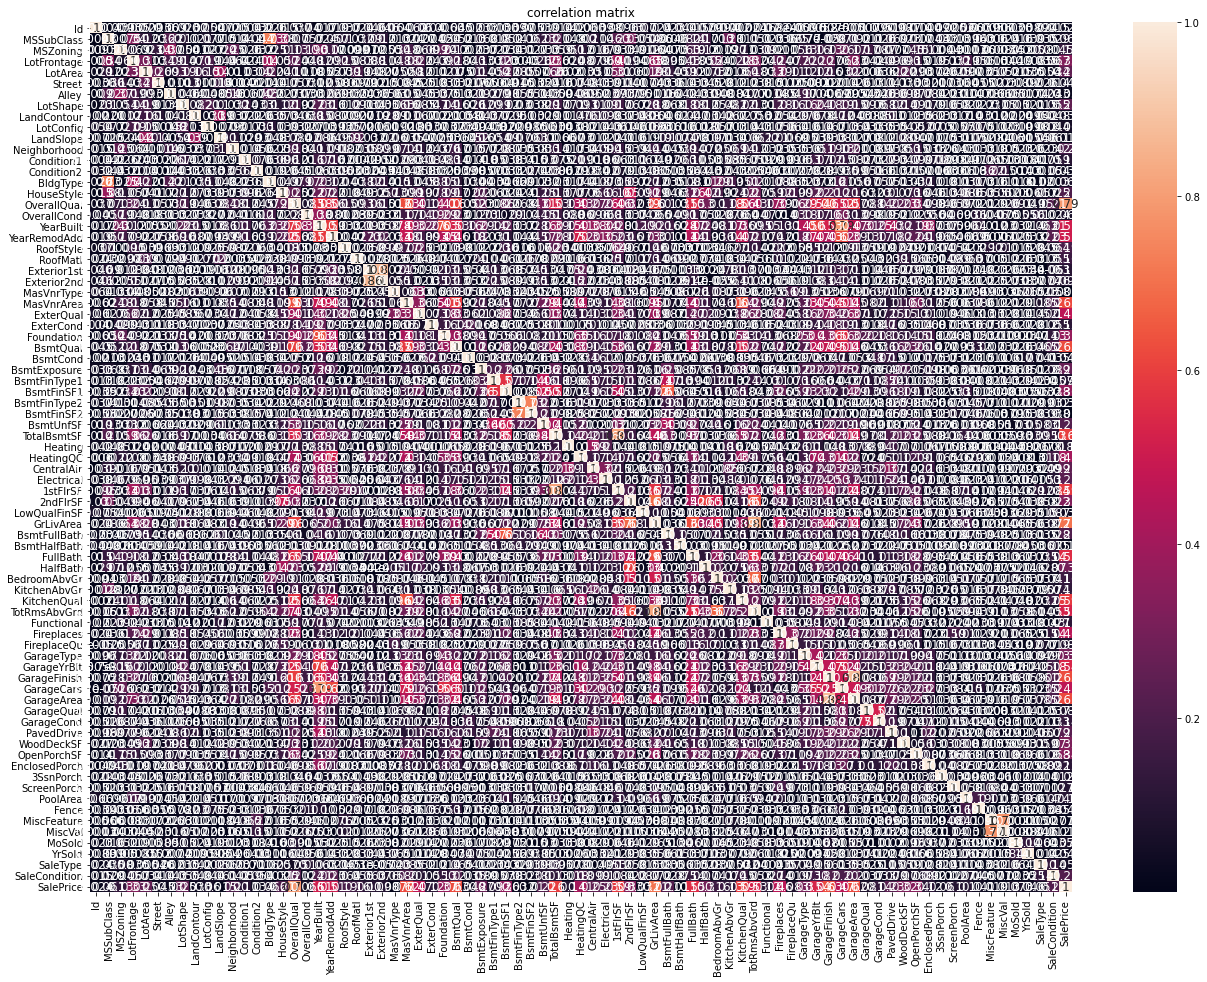

In [43]:
df_corr=it.corr().abs()

plt.figure(figsize=(22,16))
sns.heatmap(df_corr,annot=True,annot_kws={'size':12})
plt.title('correlation matrix')
plt.show() 

In [ ]:
df_corr=it1.corr().abs()

plt.figure(figsize=(22,16))
sns.heatmap(df_corr,annot=True,annot_kws={'size':12})
plt.title('correlation matrix')
plt.show() 

# Correlation with SalesPrice variable to all the features in training data:

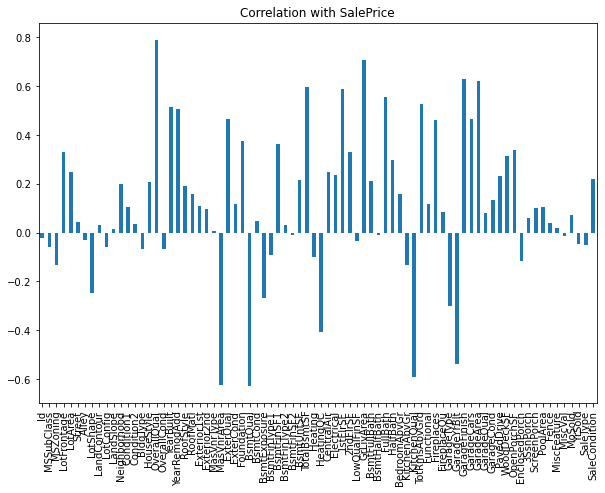

In [44]:
it.drop('SalePrice',axis=1).corrwith(it.SalePrice).plot(kind='bar',grid=False,figsize=(10,7),title='Correlation with SalePrice')
plt.show()

# Checking Outliers:

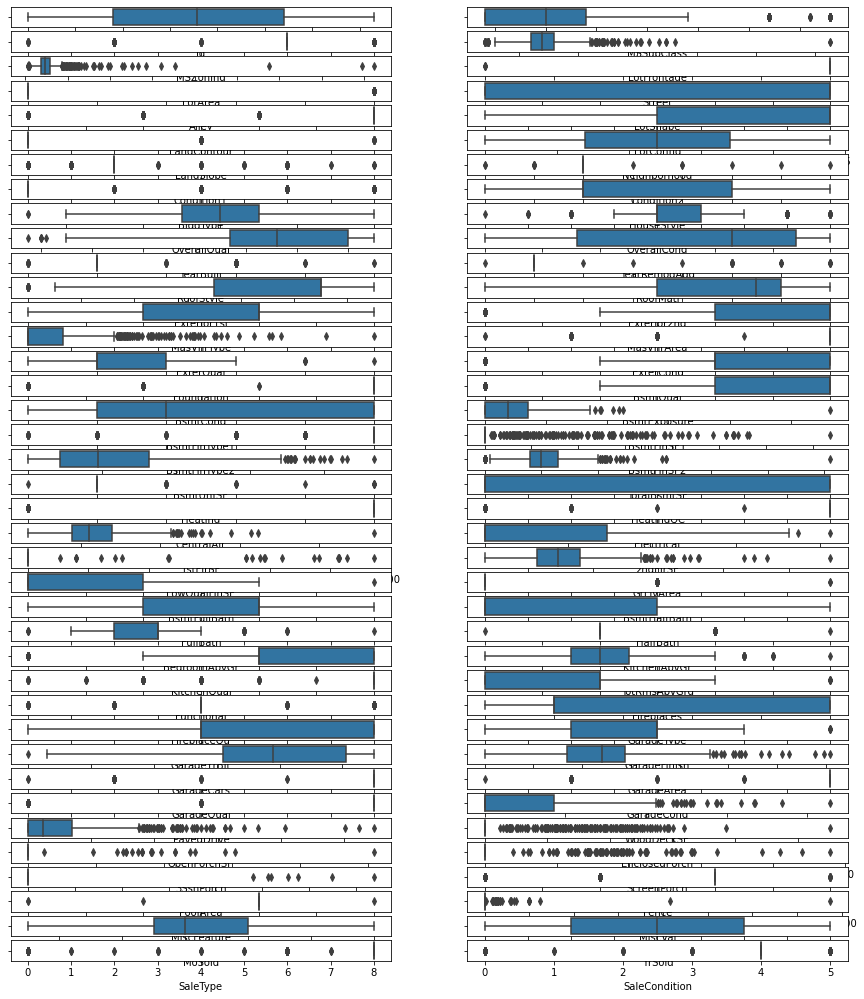

In [45]:
x=it.drop(columns=['SalePrice'])
plt.figure(figsize=(15,18))
graph=1
for column in x:
    if graph<=80:
        ax=plt.subplot(40,2,graph)
        sns.boxplot(x[column],orient='v')
        plt.xlabel(column)
    graph+=1
plt.show()  

# Skewness:

In [27]:
it.skew()

Id                0.026526
MSSubClass        1.422019
MSZoning         -1.796785
LotFrontage       2.693295
LotArea          10.659285
                   ...    
MoSold            0.220979
YrSold            0.115765
SaleType         -3.660513
SaleCondition    -2.671829
SalePrice         1.953878
Length: 79, dtype: float64

# Feature selection method:

In [67]:
from sklearn.feature_selection import SelectKBest,f_classif

x=it.drop('SalePrice',axis=1)
y=it.SalePrice

best_features=SelectKBest(score_func=f_classif,k=55)
fit=best_features.fit(x,y)
df_scores=pd.DataFrame(fit.scores_)
df_columns=pd.DataFrame(x.columns)

feature_scores=pd.concat([df_columns,df_scores],axis=1)
feature_scores.columns=['Feature_name','Score']

feature_scores.nlargest(55,'Score')

,Feature_name,Score
16,OverallQual,5.303071
73,MiscVal,3.564855
25,MasVnrArea,3.514221
45,GrLivArea,2.977506
29,BsmtQual,2.876879
52,KitchenQual,2.617125
59,GarageFinish,2.578547
48,FullBath,2.435854
61,GarageArea,2.316328
58,GarageYrBlt,2.187163


In [ ]:
# getting all the feature selected column names:

In [68]:
feature_scores.nlargest(55,'Score')['Feature_name'].unique()

array(['OverallQual', 'MiscVal', 'MasVnrArea', 'GrLivArea', 'BsmtQual',
       'KitchenQual', 'GarageFinish', 'FullBath', 'GarageArea',
       'GarageYrBlt', 'YearBuilt', '1stFlrSF', 'TotalBsmtSF', 'ExterQual',
       'Street', 'LotArea', 'YearRemodAdd', 'GarageCars', 'Heating',
       'TotRmsAbvGrd', 'MSZoning', 'Fireplaces', 'CentralAir',
       'Foundation', 'BsmtFinSF1', '2ndFlrSF', 'OpenPorchSF', 'LotShape',
       'BsmtUnfSF', 'HeatingQC', 'HalfBath', 'Neighborhood', 'WoodDeckSF',
       'BsmtExposure', 'FireplaceQu', 'BsmtCond', 'RoofMatl',
       'MasVnrType', 'GarageType', 'BedroomAbvGr', 'Electrical',
       'LotFrontage', 'BldgType', 'BsmtFullBath', 'ScreenPorch',
       'RoofStyle', 'Exterior1st', 'LandSlope', 'Exterior2nd',
       'BsmtFinSF2', 'LandContour', 'Alley', 'SaleCondition', 'YrSold',
       'PavedDrive'], dtype=object)

# Creating a new testing and training datasets:

In [20]:
df_new=it[['OverallQual', 'MiscVal', 'MasVnrArea', 'GrLivArea', 'BsmtQual',
       'KitchenQual', 'GarageFinish', 'FullBath', 'GarageArea',
       'GarageYrBlt', 'YearBuilt', '1stFlrSF', 'TotalBsmtSF', 'ExterQual',
       'Street', 'LotArea', 'YearRemodAdd', 'GarageCars', 'Heating',
       'TotRmsAbvGrd', 'MSZoning', 'Fireplaces', 'CentralAir',
       'Foundation', 'BsmtFinSF1', '2ndFlrSF', 'OpenPorchSF', 'LotShape',
       'BsmtUnfSF', 'HeatingQC', 'HalfBath', 'Neighborhood', 'WoodDeckSF',
       'BsmtExposure', 'FireplaceQu', 'BsmtCond', 'RoofMatl',
       'MasVnrType', 'GarageType', 'BedroomAbvGr', 'Electrical',
       'LotFrontage', 'BldgType', 'BsmtFullBath', 'ScreenPorch',
       'RoofStyle', 'Exterior1st', 'LandSlope', 'Exterior2nd',
       'BsmtFinSF2', 'LandContour', 'Alley', 'SaleCondition', 'YrSold',
       'PavedDrive','SalePrice']]
df_new

,OverallQual,MiscVal,MasVnrArea,GrLivArea,BsmtQual,KitchenQual,GarageFinish,FullBath,GarageArea,GarageYrBlt,...,Exterior1st,LandSlope,Exterior2nd,BsmtFinSF2,LandContour,Alley,SaleCondition,YrSold,PavedDrive,SalePrice
0,6,0,3.0,958,2.0,3.0,2,2,440,1.0,...,8.0,0.0,9.0,0,3.0,0.0,4.0,2007,2.0,128000
1,8,0,2.0,2217,3.0,2.0,2,2,621,2.0,...,12.0,1.0,13.0,823,3.0,0.0,4.0,2007,2.0,268000
2,7,0,2.0,2013,2.0,3.0,2,2,455,2.0,...,7.0,0.0,7.0,0,3.0,0.0,4.0,2007,2.0,269790
3,6,0,3.0,1844,2.0,3.0,2,2,546,1.0,...,8.0,0.0,9.0,0,3.0,0.0,4.0,2010,2.0,190000
4,6,0,2.0,1602,2.0,2.0,2,2,529,0.0,...,4.0,0.0,4.0,0,3.0,0.0,4.0,2009,2.0,215000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,5,0,3.0,900,3.0,3.0,1,1,280,2.0,...,7.0,0.0,7.0,0,3.0,0.0,4.0,2010,2.0,122000
1164,4,0,3.0,1126,3.0,2.0,2,2,520,0.0,...,11.0,0.0,12.0,0,3.0,0.0,4.0,2009,0.0,108000
1165,6,0,3.0,1456,2.0,3.0,2,2,440,2.0,...,8.0,0.0,2.0,0,3.0,0.0,4.0,2009,2.0,148500
1166,4,0,3.0,1317,3.0,3.0,1,1,250,2.0,...,3.0,0.0,3.0,0,3.0,1.0,4.0,2008,0.0,40000


In [21]:
df_new1=it1[['OverallQual', 'MiscVal', 'MasVnrArea', 'GrLivArea', 'BsmtQual',
       'KitchenQual', 'GarageFinish', 'FullBath', 'GarageArea',
       'GarageYrBlt', 'YearBuilt', '1stFlrSF', 'TotalBsmtSF', 'ExterQual',
       'Street', 'LotArea', 'YearRemodAdd', 'GarageCars', 'Heating',
       'TotRmsAbvGrd', 'MSZoning', 'Fireplaces', 'CentralAir',
       'Foundation', 'BsmtFinSF1', '2ndFlrSF', 'OpenPorchSF', 'LotShape',
       'BsmtUnfSF', 'HeatingQC', 'HalfBath', 'Neighborhood', 'WoodDeckSF',
       'BsmtExposure', 'FireplaceQu', 'BsmtCond', 'RoofMatl',
       'MasVnrType', 'GarageType', 'BedroomAbvGr', 'Electrical',
       'LotFrontage', 'BldgType', 'BsmtFullBath', 'ScreenPorch',
       'RoofStyle', 'Exterior1st', 'LandSlope', 'Exterior2nd',
       'BsmtFinSF2', 'LandContour', 'Alley', 'SaleCondition', 'YrSold',
       'PavedDrive']]


# Removing outliers using zscore technique:

In [22]:
from scipy.stats import zscore
import numpy as np
zsc=zscore(df_new)
abs_z_score=np.abs(zsc)
filtering_entry=(abs_z_score<3).all(axis=1)
df=df_new[filtering_entry]
df

,OverallQual,MiscVal,MasVnrArea,GrLivArea,BsmtQual,KitchenQual,GarageFinish,FullBath,GarageArea,GarageYrBlt,...,Exterior1st,LandSlope,Exterior2nd,BsmtFinSF2,LandContour,Alley,SaleCondition,YrSold,PavedDrive,SalePrice
0,6,0,3.0,958,2.0,3.0,2,2,440,1.0,...,8.0,0.0,9.0,0,3.0,0.0,4.0,2007,2.0,128000
2,7,0,2.0,2013,2.0,3.0,2,2,455,2.0,...,7.0,0.0,7.0,0,3.0,0.0,4.0,2007,2.0,269790
3,6,0,3.0,1844,2.0,3.0,2,2,546,1.0,...,8.0,0.0,9.0,0,3.0,0.0,4.0,2010,2.0,190000
4,6,0,2.0,1602,2.0,2.0,2,2,529,0.0,...,4.0,0.0,4.0,0,3.0,0.0,4.0,2009,2.0,215000
5,7,0,2.0,1863,2.0,2.0,3,2,660,0.0,...,11.0,0.0,12.0,0,3.0,0.0,5.0,2006,2.0,219210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1158,6,0,2.0,1208,2.0,3.0,2,1,546,1.0,...,8.0,0.0,9.0,0,3.0,0.0,4.0,2006,2.0,165000
1161,7,0,2.0,1983,2.0,2.0,2,2,490,0.0,...,11.0,0.0,12.0,0,3.0,0.0,4.0,2009,2.0,225000
1163,5,0,3.0,900,3.0,3.0,1,1,280,2.0,...,7.0,0.0,7.0,0,3.0,0.0,4.0,2010,2.0,122000
1165,6,0,3.0,1456,2.0,3.0,2,2,440,2.0,...,8.0,0.0,2.0,0,3.0,0.0,4.0,2009,2.0,148500


# Percentage Data Loss:

In [23]:
loss_percent=(1168-790)/1168*100
loss_percent

32.36301369863014

# Since there is huge loss percentage after applying zscore technique we will not consider this method

# Model Building:

In [24]:
x=df_new.drop(columns='SalePrice')
y=df_new.SalePrice

# Transforming Data to remove skwness:

In [25]:
from sklearn.preprocessing import power_transform
x=power_transform(x)
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[-0.05279875, -0.19313254,  0.778521  , ...,  0.02973497,
        -0.60482475,  0.30094685],
       [ 1.3458264 , -0.19313254, -1.12490578, ...,  0.02973497,
        -0.60482475,  0.30094685],
       [ 0.65637468, -0.19313254, -1.12490578, ...,  0.02973497,
        -0.60482475,  0.30094685],
       ...,
       [-0.05279875, -0.19313254,  0.778521  , ...,  0.02973497,
         0.899557  ,  0.30094685],
       [-1.54578212, -0.19313254,  0.778521  , ...,  0.02973497,
         0.14805187, -3.32761838],
       [-0.05279875, -0.19313254, -1.12490578, ...,  0.02973497,
        -1.35902113,  0.30094685]])

# Importing all the necessary libraries:

In [26]:
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Creating train-test split:

In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=41)

# LinearRegression model:

In [28]:
regression=LinearRegression()
regression.fit(x_train,y_train)
y_pred=regression.predict(x_test)
y_pred

array([102238.396493  , 199113.57534805, 211477.72468161, 150636.46660989,
       265806.80173979, 272410.90617523, 209995.88131493, 259416.29522378,
        57851.18248934, 208771.02256129, 143757.6415178 ,  94679.4646011 ,
       194569.74136817, 220856.10020112, 208345.79642509, 175473.64439945,
       192537.45386478, 197105.52517173, 260123.58984608, 109518.84931449,
       325489.28664944, 138235.74786168, 136128.05820357, 218777.92396561,
        40447.90206026, 261873.18737532, 389000.67042733, 158629.1258314 ,
       114016.47857671, 195582.46630591, 230431.26398438, 191851.61335254,
       172412.70780338, 207223.45109493, 101554.56369939, 151965.02900786,
       208571.04509317, 128258.4426949 , 167003.06685496,  72367.12421507,
       120906.8621092 , 156247.88773449, 247175.4560605 , 141736.10540912,
       183208.14465031, 114029.67386988,  93700.09992579, 146196.47105456,
       185667.66821322, 168964.98334893, 206222.1012661 , 290525.19566184,
       273008.16645089, 1

In [29]:
y_predtr=regression.predict(x_train)
y_predtr

array([218456.24143264,  68713.03415061, 126031.8863167 , 330552.22196966,
       103303.50742662, 175973.41820458,  88344.78810915,  95418.80140631,
       206808.96612116, 397075.55381266, 171222.13190788, 274052.64708929,
       227511.40733759, 204757.85279416, 256130.14110348, 164374.94371077,
       129271.49386705, 303452.72234576, 134959.86864437, 167601.1543848 ,
       140983.2846429 ,  77675.76770607, 119076.9312118 ,  74075.47915961,
       169252.10540922, 152951.86982741, 304887.31608214, 248687.62711354,
       185845.84084582, 156285.5884221 , 152439.02650898, 138643.03396676,
       166949.93515063, 249405.38009682, 125498.39164652, 181618.53367868,
       138710.77893147, 288867.8323994 , 237547.07985304, 141719.98179203,
       267278.3348868 ,  98114.08949481,  88680.80778257, 238264.16971324,
       269572.680817  , 101525.58000354, 234993.70406301, 131658.14021901,
       193764.46247591, 166692.26240611, 201158.33565222, 135195.641922  ,
       126097.48677499, 2

In [30]:
r2_score(y_test,y_pred) #r2 score of linear regression model

0.7423741774561421

# Linear Regression Curve:

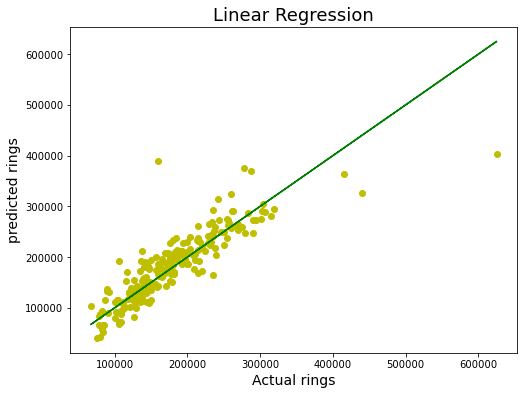

In [31]:
plt.figure(figsize=(8,6))
plt.scatter(y_test,y_pred,color='y')
plt.plot(y_test,y_test,color='g')
plt.xlabel('Actual rings',fontsize=14)
plt.ylabel('predicted rings',fontsize=14)
plt.title('Linear Regression',fontsize=18)
plt.show()

# CrossValidation score:

In [79]:
training_accuracy=r2_score(y_train,y_predtr)
testing_accuracy=r2_score(y_test,y_pred)
from sklearn.model_selection import cross_val_score
for i in range(2,10):
    csv=cross_val_score(regression,x,y,cv=i)
    cv_mean=csv.mean()
    print('at cv:-',i)
    print('cv score-',cv_mean*100)
    print('training_accuracy-',training_accuracy*100)
    print('testing_accuracy-',testing_accuracy*100)

at cv:- 2
cv score- 77.37729410391768
training_accuracy- 83.4600691907979
testing_accuracy- 74.23741774561421
at cv:- 3
cv score- 78.27427393438336
training_accuracy- 83.4600691907979
testing_accuracy- 74.23741774561421
at cv:- 4
cv score- 78.2817426122488
training_accuracy- 83.4600691907979
testing_accuracy- 74.23741774561421
at cv:- 5
cv score- 78.37993695126389
training_accuracy- 83.4600691907979
testing_accuracy- 74.23741774561421
at cv:- 6
cv score- 78.5125670953018
training_accuracy- 83.4600691907979
testing_accuracy- 74.23741774561421
at cv:- 7
cv score- 78.55173847209981
training_accuracy- 83.4600691907979
testing_accuracy- 74.23741774561421
at cv:- 8
cv score- 78.48025758316923
training_accuracy- 83.4600691907979
testing_accuracy- 74.23741774561421
at cv:- 9
cv score- 78.74105822397043
training_accuracy- 83.4600691907979
testing_accuracy- 74.23741774561421


# Regularisation and HyperParameter Tuning:

In [80]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

parameters={'alpha':[0.0001,.001,.01,.1,1,10], 'random_state':list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'alpha': 10, 'random_state': 0}


# Lasso Regression :

In [33]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
ls=Lasso(alpha=10,random_state=0)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_ls=ls.predict(x_test)

lss=r2_score(y_test,pred_ls)
lss

0.7425260295759903

In [34]:
from sklearn.model_selection import cross_val_score
csv=cross_val_score(ls,x,y,cv=9)
cv_mean=csv.mean()
cv_mean

0.7875568967830889

# Using Ensemble Approach:
   > # RandomForestRegressor:

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor


parameters={'criterion':['mse', 'mae'],
            'max_features':['auto', 'sqrt', 'log2'],
            'max_depth':[10,15],
            'min_samples_split':[10,11]}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

In [36]:
from sklearn.ensemble import RandomForestRegressor

rf=RandomForestRegressor(criterion='mse',max_features='sqrt',max_depth=15,min_samples_split=10)
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred_rf=rf.predict(x_test)

rfs=r2_score(y_test,pred_rf)
print('R2 Score: ',rfs*100)

rfcsv=cross_val_score(rf,x,y,cv=9)
rf_cv_mean=rfcsv.mean()
print('Cross validation Score: ',rf_cv_mean*100)

R2 Score:  81.10033953331379
Cross validation Score:  84.42578434420281


# DecisionTreeRegression:

In [86]:
from sklearn.tree import DecisionTreeRegressor

param_grid={'criterion':['mse', 'mae'],
            'max_depth':range(10,15),
            'min_samples_split':range(3,8),
            'max_features':['auto', 'sqrt', 'log2'],
            #'max_leaf_nodea':range(3,7)
           }
dtr=DecisionTreeRegressor()
clf=GridSearchCV(dtr,param_grid)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'criterion': 'mse', 'max_depth': 10, 'max_features': 'auto', 'min_samples_split': 7}


In [37]:
from sklearn.tree import DecisionTreeRegressor

dtr=DecisionTreeRegressor(criterion='mse',max_features='auto',max_depth=10,min_samples_split=7)
dtr.fit(x_train,y_train)
dtr.score(x_train,y_train)
pred_dtr=dtr.predict(x_test)

dtrs=r2_score(y_test,pred_dtr)
print('R2 Score: ',dtrs*100)

dtrcsv=cross_val_score(dtr,x,y,cv=9)
dtr_cv_mean=dtrcsv.mean()
print('Cross validation Score: ',dtr_cv_mean*100)

R2 Score:  74.63080470705042
Cross validation Score:  74.2115885228495


# K-NeighborsRegression:

In [88]:
from sklearn.neighbors import KNeighborsRegressor

param_grid={'algorithm':['kd-tree','brute'],
            'leaf_size':[3,5 ,6,7,8],
            'n_neighbors':[3,5,7,9,11,13],
            'p':[1,2]}
knr=KNeighborsRegressor()
clf=GridSearchCV(knr,param_grid)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'algorithm': 'brute', 'leaf_size': 3, 'n_neighbors': 3, 'p': 1}


In [38]:
from sklearn.neighbors import KNeighborsRegressor

knr=KNeighborsRegressor(algorithm='brute',leaf_size=3,n_neighbors=3,p=1)
knr.fit(x_train,y_train)
knr.score(x_train,y_train)
pred_knr=knr.predict(x_test)

knrs=r2_score(y_test,pred_knr)
print('R2 Score: ',knrs*100)

knrcsv=cross_val_score(knr,x,y,cv=9)
knr_cv_mean=knrcsv.mean()
print('Cross validation Score: ',knr_cv_mean*100)

R2 Score:  76.49128003508795
Cross validation Score:  79.56116346332203


>Out of all model Random foprest regressor is having R2 Score: 81.10033953331379 and Cross validation Score: 84.42578434420281 .So, this model is finalised and further saved.

# Saving the trained model:

In [39]:
import pickle
filename='Saleprice_prediction.pkl'
pickle.dump(rf,open(filename,'wb'))

# loading the model:

In [40]:
loaded_model=pickle.load(open('Saleprice_prediction.pkl','rb'))


# Predicting the SalePrice for tested dataset using trained model:

In [52]:
Y=rf.predict(df_new1)
len(Y)# length of the Y column series

292

# Adding the Price column to the tested dataset:

In [96]:
df1["SalePrice"]=Y
df1

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,337,20,RL,86.0,14157,Pave,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,NaN,0,7,2007,WD,Normal,413693.879595
1,1018,120,RL,NaN,5814,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2009,COD,Abnorml,377127.793981
2,929,20,RL,NaN,11838,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,376297.415196
3,1148,70,RL,75.0,12000,Pave,NaN,Reg,Bnk,AllPub,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,391975.279339
4,1227,60,RL,86.0,14598,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,420819.247829
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,83,20,RL,78.0,10206,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2008,WD,Normal,405749.262082
288,1048,20,RL,57.0,9245,Pave,NaN,IR2,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,364697.971088
289,17,20,RL,NaN,11241,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,700,3,2010,WD,Normal,387715.532629
290,523,50,RM,50.0,5000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2006,WD,Normal,435816.450371


In [99]:
df2=pd.read_csv('train.csv')# Getting the train dataset
df2

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,289,20,RL,NaN,9819,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,122000
1164,554,20,RL,67.0,8777,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,5,2009,WD,Normal,108000
1165,196,160,RL,24.0,2280,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,148500
1166,31,70,C (all),50.0,8500,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,7,2008,WD,Normal,40000


# Combining train and test data set:

In [101]:
df_sum=pd.concat([df2, df1])
df_sum

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000.000000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000.000000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790.000000
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000.000000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,83,20,RL,78.0,10206,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2008,WD,Normal,405749.262082
288,1048,20,RL,57.0,9245,Pave,NaN,IR2,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,364697.971088
289,17,20,RL,NaN,11241,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,700,3,2010,WD,Normal,387715.532629
290,523,50,RM,50.0,5000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2006,WD,Normal,435816.450371
